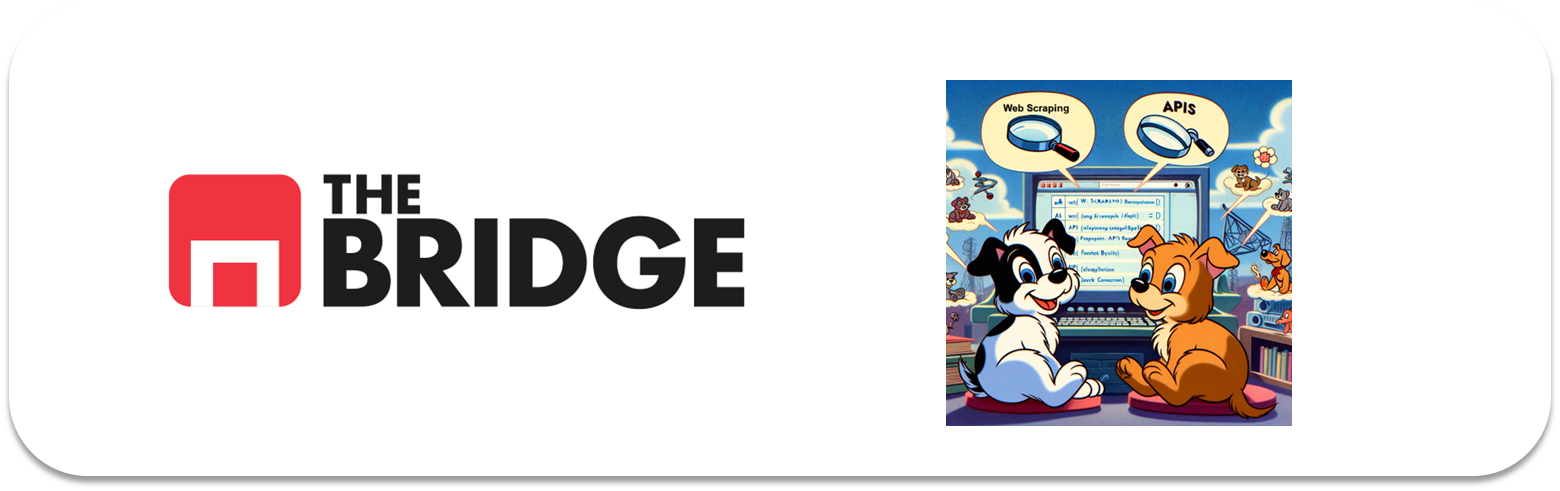

## PRACTICA OBLIGATORIA: SQL

* La práctica obligatoria de esta unidad consiste en extraer datos de películas de dos fuentes diferentes y cruzarlos, para una fuente tiraremos de Scraping y para la otra de API, y luego practicarás con pandas un poco. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

## Objetivo

El objetivo final es tener un `DataFrame` con una serie de películas de 2023, sus datos más destacados (titulo, año de lanzamiento, director, guionistas, actores, género(s), coste de producción *budget* y recaudación a nivel USA y a nivel mundial). Para ello tendrás que acceder a dos fuentes de información y unir los datos, además cada fuente con un método diferente. Al final tendrás que contestar a unas preguntas sencillas. 


## #0

Como siempre, haz aquí todos los imports que necesites:

In [35]:
api_key = "26777724d4935e11c258702a2ddfa7bd"  


In [37]:
import json
import pandas as pd
import requests

from bs4 import BeautifulSoup as bs

## #1 API: The Movie Database (TMDb)

Cambiamos el orden temático de la unidad y empezamos por obtener los datos de las películas antes de obtener sus datos de ingresos porque tiene más sentido, ya que mandan las películas.

Vamos a acceder a TMDb cuyos datos básicos te dejo aquí (pero recuerda que es la última vez, a partir de ahora tendrás que buscar la info de las APIs por tu cuenta)


### API de The Movie Database (TMDb)

- **URL Base**: `https://api.themoviedb.org/3`


#### Endpoints Principales:

1. **Obtener Detalles de una Película**:
   - **Endpoint**: `/movie/{movie_id}`
   - **Método**: GET
   - **Uso**: Obtiene detalles específicos de una película utilizando su ID.
   - **Ejemplo**: `https://api.themoviedb.org/3/movie/550?api_key=tu_api_key`


2. **Buscar Películas**:
   - **Endpoint**: `/search/movie`
   - **Método**: GET
   - **Uso**: Busca películas por título.
   - **Ejemplo**: `https://api.themoviedb.org/3/search/movie?query=Inception&api_key=tu_api_key`

3. **Buscar películas por diferentes criterios**:
   - **Endpoint**: `/discover/movie`
   - **Método**: GET
   - **Uso**: Obtiene información de las películas por criterios, tiene más de 30 filtros y funciones de ordenación.
   - **Ejemplo**: `https://api.themoviedb.org/3/person/500?api_key=tu_api_key`

4. **Obtener Películas Populares**:
   - **Endpoint**: `/movie/popular`
   - **Método**: GET
   - **Uso**: Devuelve una lista de películas populares.
   - **Ejemplo**: `https://api.themoviedb.org/3/movie/popular?api_key=tu_api_key`

Recuerda reemplazar `tu_api_key` con tu propia API key.

### 1.1

Investiga en la página de [documentación](https://developer.themoviedb.org/reference/discover-movie) detallada del endpoint de "Discover" e identifica los parámetros que tenemos que pasar a la API para obtener las 20 películas americanas y las 20 españolas de 2023 más populares. 

Nota: Las respuestas de esta API están paginadas, y cada página contiene 20 respuestas, si quisieramos más tendríamos que incluir el parámetro `page` con su número en peticiones diferentes, por eso para esta práctica lo vamos a limitar a 20 respuestas, para que no haya que jugar con el paginado).

*Los parámetros a usar podrían ser `primary_released_year`, `year`, `with_origin_country` y ordenar por popolaridad de forma descendiente usando el parámetro `sort_by` con valor a `popularity.desc`*

### 1.2

Para poder hacer la llamada a la API con endpoint "Discover" necesitamos pasarle una serie de parámetros como los anteriores y la API_Key. Hay dos formas de hacerlo, mediante la querystring en la url o mediante el argumento params de request. Como tenemos que hacer una consulta para las películas estadounidenses y otra para las españolas, vamos a utilizar los dos métodos.

En este ejercicio se pide usar el método de incluir todos los parámetros en la url mediante la sintaxis ?\<parametro>=\<valor>&... para obtener las 20 películas norteamericanas más populares de 2023, según TMDb. Para ello crea una variable `url_usa` a partir de la siguiente guía:  

url_usa = base_url + end_point + "?\<parametro1>=\<valor1>&\<parametros2>=\<valor2>..."  

Donde tendrá que incluir los parámetros "api_key" con valor tu api_key para TMDb y el resto de parámetros que necesites con sus valores para obtener los datos pedidos (utiliza `year` para el año). Luego utiliza el metodo request adecuado y vuelca la salida en `respuesta_usa`

Ojo el valor del nombre de Estados Unidos en este caso no es USA, pero casi.

EXTRA: Hay una forma de que te devuelva los datos en español cuando corresponda, a ver si lo logras.

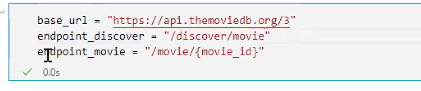

In [ ]:
base_url = 'https://api.themoviedb.org/3'
endpoint_discover = '/discover/movie'
endpoint_movie = '/movie/{movie_id}'

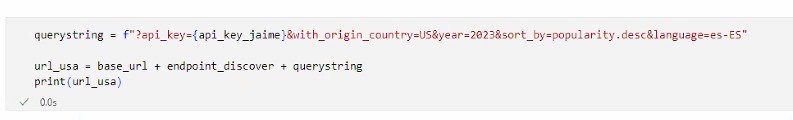

In [ ]:
querystring = f"?api_key={api_key}&with_origin_country=US&year=2023&sort_by=popularity.desc&language=es-ES"
url_usa = base_url +endpoint_discover+querystring
print(url_usa)

https://api.themoviedb.org/3/discover/movie?api_key=26777724d4935e11c258702a2ddfa7bd&with_origin_country=US&year=2023&sort_by=popularity.desc&language=es-ES


In [ ]:
respuesta_usa = requests.get(url_usa)

### 1.3 

Escribe el código de respuesta y su explicación. Vuelca los datos de la respuesta en una variable `datos_usa` (es decir el resultado del metodo `json`). Muestra los campos del json de respuesta y decide cuál es el que vamos a usar para extrarer los datos. Muestra los valores para ese campo y luego asignalo a la variable `pelis_usa`.

In [ ]:
type(respuesta_usa)

requests.models.Response

In [ ]:
print(respuesta_usa.status_code, respuesta_usa.reason)

200 OK


In [ ]:
datos_usa = respuesta_usa.json()
print(list(datos_usa.keys()))
datos_usa

['page', 'results', 'total_pages', 'total_results']


{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/9PqD3wSIjntyJDBzMNuxuKHwpUD.jpg',
   'genre_ids': [16, 35, 10751],
   'id': 1075794,
   'original_language': 'en',
   'original_title': 'Leo',
   'overview': 'Leo (Sandler) es un lagarto de 74 años que lleva atrapado en el mismo aula de Florida durante décadas con su compañera de terrario, una tortuga (Bill Burr). Cuando se entera de que solo le queda un año de vida, Leo planea escapar para experimentar la vida en el exterior, pero entonces comienzan sus problemas.',
   'popularity': 1828.905,
   'poster_path': '/hs41WYhEuaq4PaBbtaoCfGFEebi.jpg',
   'release_date': '2023-11-17',
   'title': 'Leo',
   'video': False,
   'vote_average': 7.7,
   'vote_count': 297},
  {'adult': False,
   'backdrop_path': '/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg',
   'genre_ids': [18, 36],
   'id': 872585,
   'original_language': 'en',
   'original_title': 'Oppenheimer',
   'overview': "Película sobre el físico J. Robert Oppenheimer y su papel como de

In [ ]:
datos_usa["results"]

[{'adult': False,
  'backdrop_path': '/9PqD3wSIjntyJDBzMNuxuKHwpUD.jpg',
  'genre_ids': [16, 35, 10751],
  'id': 1075794,
  'original_language': 'en',
  'original_title': 'Leo',
  'overview': 'Leo (Sandler) es un lagarto de 74 años que lleva atrapado en el mismo aula de Florida durante décadas con su compañera de terrario, una tortuga (Bill Burr). Cuando se entera de que solo le queda un año de vida, Leo planea escapar para experimentar la vida en el exterior, pero entonces comienzan sus problemas.',
  'popularity': 1828.905,
  'poster_path': '/hs41WYhEuaq4PaBbtaoCfGFEebi.jpg',
  'release_date': '2023-11-17',
  'title': 'Leo',
  'video': False,
  'vote_average': 7.7,
  'vote_count': 297},
 {'adult': False,
  'backdrop_path': '/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg',
  'genre_ids': [18, 36],
  'id': 872585,
  'original_language': 'en',
  'original_title': 'Oppenheimer',
  'overview': "Película sobre el físico J. Robert Oppenheimer y su papel como desarrollador de la bomba atómica. Basada en e

In [ ]:
from pprint import pprint # pretty print

def pinta_dict(diccionario):
    print(json.dumps(diccionario,indent=4,ensure_ascii=False)) #El indent dependerá del número de subclaves en diccionarios internos
    
def pinta_dict_alt(diccionario):
    pprint(diccionario)

for resultado in datos_usa["results"]:
    pinta_dict_alt(resultado)
    print('*'*10 + '\n'*2)

{'adult': False,
 'backdrop_path': '/9PqD3wSIjntyJDBzMNuxuKHwpUD.jpg',
 'genre_ids': [16, 35, 10751],
 'id': 1075794,
 'original_language': 'en',
 'original_title': 'Leo',
 'overview': 'Leo (Sandler) es un lagarto de 74 años que lleva atrapado en el '
             'mismo aula de Florida durante décadas con su compañera de '
             'terrario, una tortuga (Bill Burr). Cuando se entera de que solo '
             'le queda un año de vida, Leo planea escapar para experimentar la '
             'vida en el exterior, pero entonces comienzan sus problemas.',
 'popularity': 1828.905,
 'poster_path': '/hs41WYhEuaq4PaBbtaoCfGFEebi.jpg',
 'release_date': '2023-11-17',
 'title': 'Leo',
 'video': False,
 'vote_average': 7.7,
 'vote_count': 297}
**********


{'adult': False,
 'backdrop_path': '/fm6KqXpk3M2HVveHwCrBSSBaO0V.jpg',
 'genre_ids': [18, 36],
 'id': 872585,
 'original_language': 'en',
 'original_title': 'Oppenheimer',
 'overview': 'Película sobre el físico J. Robert Oppenheimer y su pa

### 1.3 Alt

Si no tienes una API-Key o no has conseguido obtener los valores, lee el archivo "./data/usa_movies.json" de la forma conveniente y vuelca sus datos en una variable llamada `pelis_usa`

In [ ]:
with open("./data/usa_movies.json") as f:
    pelis_usa = json.load(f)

### 1.4 

Convierte los resultados a un `DataFrame` aprovechando que es una lista de diccionarios con la misma estructura. Asigna lo a "df_movies". Muestra sus primeras filas y la info general.

In [ ]:
df_movies = pd.DataFrame(pelis_usa)
df_movies

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/xgGGinKRL8xeRkaAR9RMbtyk60y.jpg,"[16, 10751, 10402, 14, 35]",901362,en,Trolls Band Together,"Cuando Floyd, uno de los hermanos de Branch, e...",2508.728,/yco6dWR1W3iANUEKxGT0vQRWrJn.jpg,2023-10-12,Trolls 3: Todos juntos,False,7.3,127
1,False,/kjQBrc00fB2RjHZB3PGR4w9ibpz.jpg,"[878, 28, 53]",670292,en,The Creator,En medio de una guerra futura entre la raza hu...,1622.502,/c6otMCRG9bZzI97o9V8hCkOgUvA.jpg,2023-09-27,The Creator,False,7.1,1104
2,False,/rLb2cwF3Pazuxaj0sRXQ037tGI1.jpg,"[18, 36]",872585,en,Oppenheimer,Película sobre el físico J. Robert Oppenheimer...,1766.305,/ncKCQVXgk4BcQV6XbvesgZ2zLvZ.jpg,2023-07-19,Oppenheimer,False,8.2,4885
3,False,/t5zCBSB5xMDKcDqe91qahCOUYVV.jpg,"[27, 9648]",507089,en,Five Nights at Freddy's,Un guardia de seguridad con problemas comienza...,1252.998,/t6RSJ1z8bDEYpk4fLwxfkXciUak.jpg,2023-10-25,Five Nights at Freddy's,False,7.9,2501
4,False,/rMvPXy8PUjj1o8o1pzgQbdNCsvj.jpg,"[28, 12, 53]",299054,en,Expend4bles,Cuarta entrega de la saga Los Mercenarios. El ...,873.341,/2jmE7xH0R0dikmc8iplCPCit4MD.jpg,2023-09-15,Los mercenarios 4,False,6.4,792
5,False,/f1AQhx6ZfGhPZFTVKgxG91PhEYc.jpg,"[18, 36, 10752]",753342,en,Napoleon,Una mirada personal a los orígenes del líder m...,748.635,/nGQYZ0TEUoGOlBzTCLFUCTRkZuQ.jpg,2023-11-22,Napoleón,False,6.4,201
6,False,/4XM8DUTQb3lhLemJC51Jx4a2EuA.jpg,"[28, 80, 53]",385687,en,Fast X,Dom Toretto y su familia se convierten en el o...,749.903,/qDRrP4NATGTWH8ORJV6T0BeoIhQ.jpg,2023-05-17,Fast & Furious X,False,7.2,4334
7,False,/628Dep6AxEtDxjZoGP78TsOxYbK.jpg,"[28, 53]",575264,en,Mission: Impossible - Dead Reckoning Part One,Ethan Hunt (Tom Cruise) y la IMF emprenden la ...,762.172,/83sGKvCv2T2CulYbd40Aeduc7n2.jpg,2023-07-08,Misión: Imposible - Sentencia mortal parte uno,False,7.6,2531
8,False,/9PqD3wSIjntyJDBzMNuxuKHwpUD.jpg,"[16, 35, 10751]",1075794,en,Leo,Leo (Sandler) es un lagarto de 74 años que lle...,646.520,/hs41WYhEuaq4PaBbtaoCfGFEebi.jpg,2023-11-11,Leo,False,7.9,153
9,False,/5a4JdoFwll5DRtKMe7JLuGQ9yJm.jpg,"[28, 12, 878]",695721,en,The Hunger Games: The Ballad of Songbirds & Sn...,Años antes de convertirse en el tiránico presi...,595.362,/eaiUgabhNozGGmBb1wlUybWoBoQ.jpg,2023-11-15,Los Juegos del Hambre: Balada de pájaros canto...,False,7.2,392


### 1.5



De las columnas que tenemos realmente nos interesan unas pocas. Yo me voy a quedar con las siguientes:

```python
col_seleccionadas = ["id","genre_ids","original_title","title","overview","vote_average"]
```

Añade alguna más si quieres, pero manten las anteriores siempre. Construye un nuevo `DataFrame`, "df_pop_usa", que contenga sólo las columnas seleccionadas

In [ ]:
col_seleccionadas = ["id","genre_ids","original_title","title","overview","vote_average"]
df_pop_usa = df_movies[col_seleccionadas].copy()

### 1.6 

Guardamos ese dataframe para luego, ahora vamos a buscar las películas españolas. Para ello vamos a probar el otro método, ahora crea un diccionario siguiendo esta estructura:

```python
querystring = {
    "api_key": "PON AQUI TU API-KEY",
    "parametro1": "valor1",
    ...
}
```

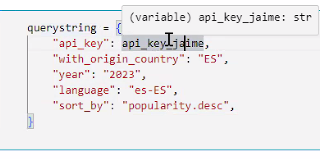

In [ ]:
querystring = {
    "api_key": api_key ,
    "with_origin_conuntry":"ES",
    "year":"2023",
    "languge":"es-ES",
    "sort_by":"popularity.desc"
}

### 1.7

Ahora construye la url_spain, pero ten en cuenta que ya sólo necesitas la url base y el endpoint


In [ ]:
url_spain = base_url + endpoint_discover
print(url_spain)

https://api.themoviedb.org/3/discover/movie


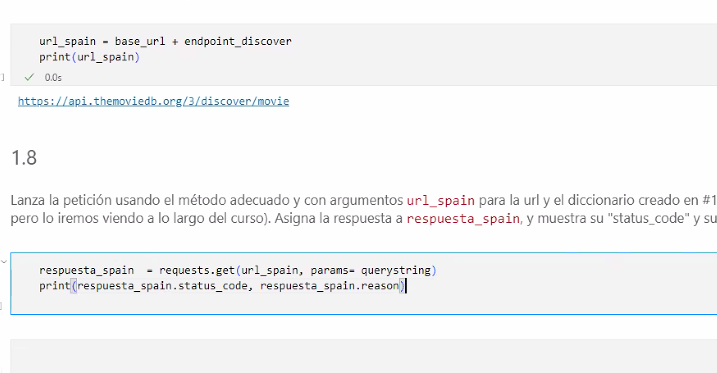

### 1.8

Lanza la petición usando el método adecuado y con argumentos `url_spain` para la url y el diccionario creado en \#1.6 para el argumento "params" (que es como se envían parametros fuera de la url, hay otra forma a través del parámetro data, pero lo iremos viendo a lo largo del curso). Asigna la respuesta a `respuesta_spain`, y muestra su "status_code" y su "reason".

In [ ]:
respuesta_spain = requests.get(url_spain, params = querystring) # El parámetro params siempre espera recibir un json (en este caso, diccionario)
print(respuesta_spain.status_code, respuesta_spain.reason)

200 OK


In [ ]:
datos = respuesta_spain.json()["results"]

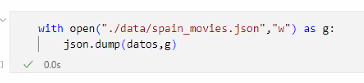

In [ ]:
with open("./data/spain_movies.json","w") as g:
    json.dump(datos, g)

### 1.9 
Repite todo el proceso que hicimos para las películas norteamericanas hasta obtener un dataframe similar (con las mismas columnas), llámalo `df_pop_spain`. Si no tienes el API-Key o no has sabido obtener los datos de la API, utiliza los datos que hay en "./data/spain_movies.json"

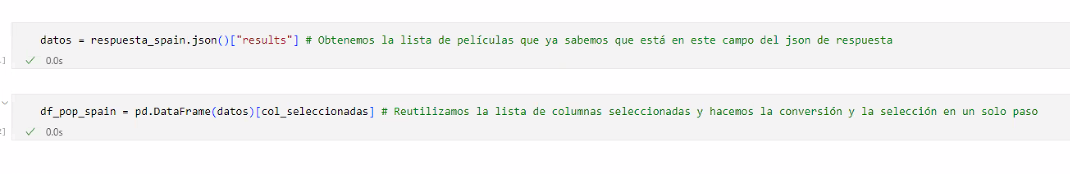

In [ ]:
datos = respuesta_spain.json()["results"] #Obtenemos la lista de películas que ya sabemos que está en este cmapo del json de respuesta

In [ ]:
df_pop_spain = pd.DataFrame(datos)[col_seleccionadas]

### 1.10 
Para concluir esta parte, junta los dos dataframes en uno solo, df_base_movies, usando el método [pd.concat](https://pandas.pydata.org/docs/reference/api/pandas.concat.html) de pandas. Luego convierte la columna id en su índice.

In [ ]:
df_base_movies = pd.concat([df_pop_usa,df_pop_spain])
df_base_movies.set_index("id",inplace=True)
df_base_movies

,genre_ids,original_title,title,overview,vote_average
id,,,,,
901362,"[16, 10751, 10402, 14, 35]",Trolls Band Together,Trolls 3: Todos juntos,"Cuando Floyd, uno de los hermanos de Branch, e...",7.3
670292,"[878, 28, 53]",The Creator,The Creator,En medio de una guerra futura entre la raza hu...,7.1
872585,"[18, 36]",Oppenheimer,Oppenheimer,Película sobre el físico J. Robert Oppenheimer...,8.2
507089,"[27, 9648]",Five Nights at Freddy's,Five Nights at Freddy's,Un guardia de seguridad con problemas comienza...,7.9
299054,"[28, 12, 53]",Expend4bles,Los mercenarios 4,Cuarta entrega de la saga Los Mercenarios. El ...,6.4
753342,"[18, 36, 10752]",Napoleon,Napoleón,Una mirada personal a los orígenes del líder m...,6.4
385687,"[28, 80, 53]",Fast X,Fast & Furious X,Dom Toretto y su familia se convierten en el o...,7.2
575264,"[28, 53]",Mission: Impossible - Dead Reckoning Part One,Misión: Imposible - Sentencia mortal parte uno,Ethan Hunt (Tom Cruise) y la IMF emprenden la ...,7.6
1075794,"[16, 35, 10751]",Leo,Leo,Leo (Sandler) es un lagarto de 74 años que lle...,7.9


## #2 Scrapping: BoxOfficeMojo

### 2.1 [EXTRA] 
Si el primer ejercicio es extra, porque el tiempo de ejecución depende muy mucho de lo bien que se te de inspeccionar la página y entender los tags y los atributos. Pero te animo a que lo intentes, lo haremos en clase en cualquier caso.

Este ejercicio consiste en scrapear la página de ingresos mundiales de las películas con mayores ingresos que ofrece el site BoxOfficeMojo en la siguiente url:

In [ ]:
url_mojo = "https://www.boxofficemojo.com/year/world/?ref_=bo_nb_wey_tab"

Tendrás que acceder inspeccionar y buscar los tags necesarios para obtener una dataframe que refleje los mismos datos que muestra la tabla.

Para hacerte más sencillo el trabajo, te doy aquí algunas pistas:

* Los nombres de los campos se pueden obtener de los tag "th" que hay dentro del tag "table" con atributo `class='a-bordered a-horizontal-stripes a-size-base a-span12 mojo-body-table mojo-table-annotated'`

* Los valores se encuentran en los tags "tr" del tag "tbody". Tendrás que ver cómo sacarlos de ahí.

1. Inspecciona la página y ve desplegando hasta encontrar tbody y ahí ya investiga hasta dar con los tags últimos que tienen los datos.
2. Repasa las soluciones a los ejercicios del workout de WebScraping para conseguir llegar al `DataFrame`

In [38]:
mojo = requests.get(url_mojo)
print(mojo.status_code,mojo.reason)
sopa = bs(mojo.text, "lxml")

200 OK


In [40]:
columnas_mojo = []
tabla = sopa.find("table")
for tag_cabecera in tabla.find_all("th"):  # De nuestra inspección vimos que los nombres de las columnas estaban en los tags th
    print(tag_cabecera.text.strip())  # Comprobamos que sea así quitándole cualquier añadido innecesario
    columnas_mojo.append(tag_cabecera.text)

Rank
Release Group
Worldwide
Domestic
%
Foreign
%


### 2.2

Si no has podido hacer el ejercicio Extra anterior, lee los datos que hay en "./data/mojo_data.xlsx", cargándolos en un dataframe al que puedes poner por nombre "df_mojo". Usar "Rank" como índice y muestra el contenido y su información general.

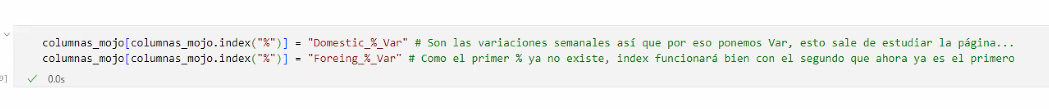

In [41]:
columnas_mojo[columnas_mojo.index("%")] = "Domestic_%_var"
columnas_mojo[columnas_mojo.index("%")] = "Foreing_%_var"


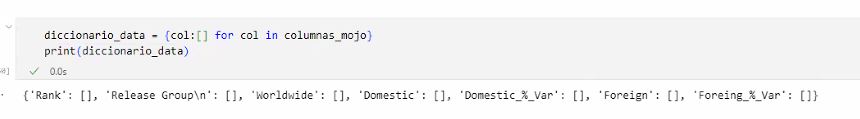

In [42]:
diccionario_data = {col: [] for col in columnas_mojo}
print(diccionario_data)

{'Rank': [], 'Release Group\n': [], 'Worldwide': [], 'Domestic': [], 'Domestic_%_var': [], 'Foreign': [], 'Foreing_%_var': []}


In [43]:
for filas in sopa.find_all("tr")[0:10]:
    for valor in filas.find_all("td"):
        print(valor.text)

1
Barbie
$1,441,791,846
$636,191,846
44.1%
$805,600,000
55.9%
2
The Super Mario Bros. Movie
$1,361,976,691
$574,934,330
42.2%
$787,042,361
57.8%
3
Oppenheimer
$950,554,020
$325,367,020
34.2%
$625,187,000
65.8%
4
Guardians of the Galaxy Vol. 3
$845,555,777
$358,995,815
42.5%
$486,559,962
57.5%
5
Fast X
$704,709,660
$145,960,660
20.7%
$558,749,000
79.3%
6
Spider-Man: Across the Spider-Verse
$690,516,673
$381,311,319
55.2%
$309,205,354
44.8%
7
The Little Mermaid
$569,626,289
$298,172,056
52.3%
$271,454,233
47.7%
8
Mission: Impossible - Dead Reckoning Part One
$567,535,383
$172,135,383
30.3%
$395,400,000
69.7%
9
Elemental
$495,923,852
$154,426,697
31.1%
$341,497,155
68.9%


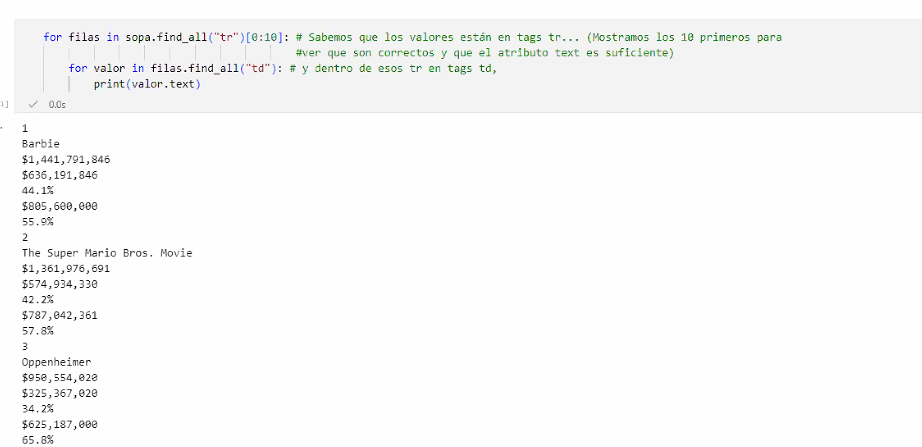

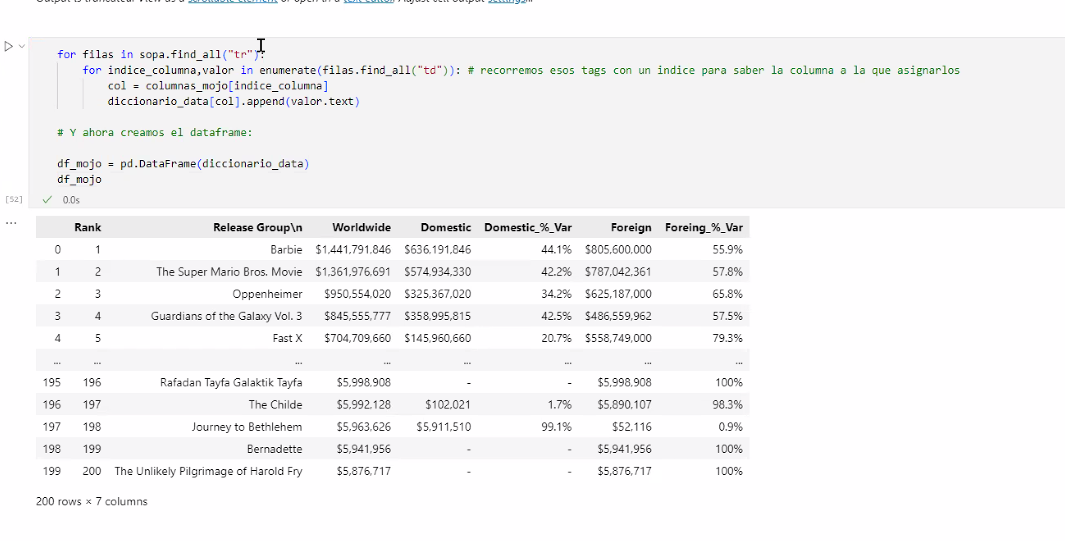

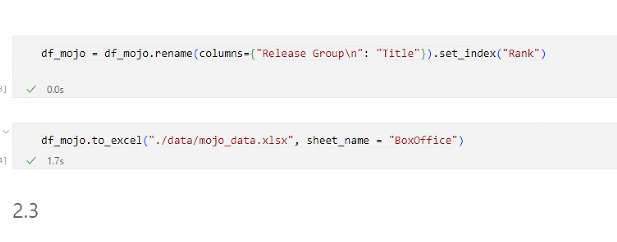

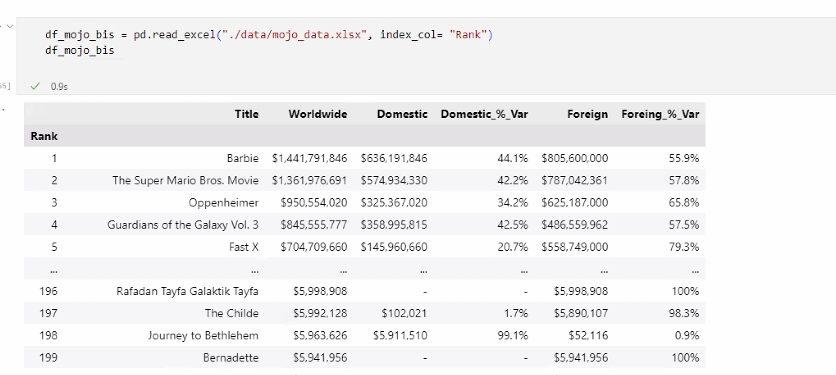

### 2.3

Algunos campos tendrán un nombre raro, cambia esos % por el "<nombre de la columna anterior>_%_var"

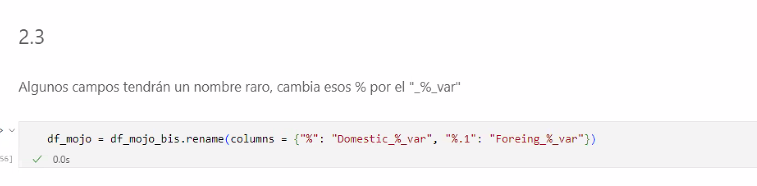

### 2.4

Hora de volver a nuestro `DataFrame` de peliculas obtenido de la API. Pégale las recuadaciones de df_mojo, de forma que mantegamos las 40 peliculas populares, no importa cuantas de df_mojo queden. ¿Qué método vas a usar?¿Qué tipo de join quieres hacer?¿Qué campos son los índices?

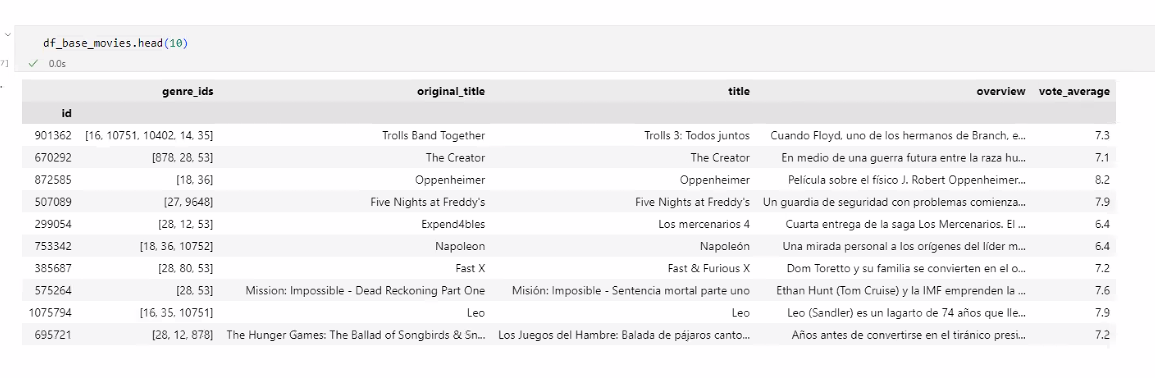

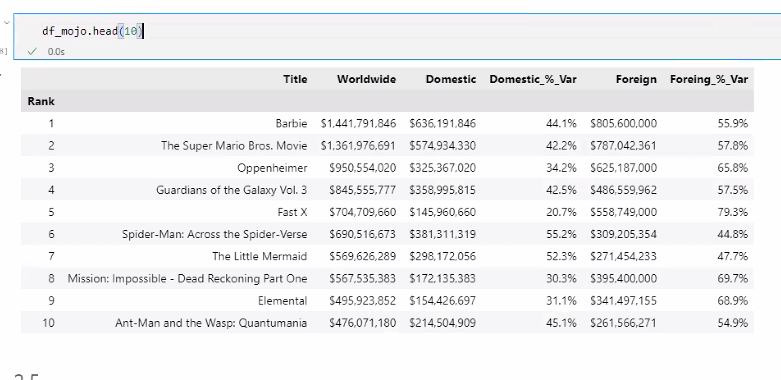

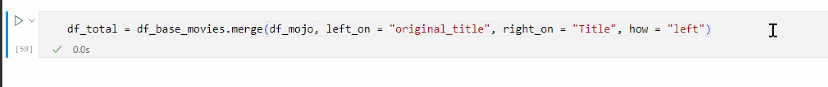

### 2.5 
Muestra los 10 primeros registros del resultado del cruce y su información general

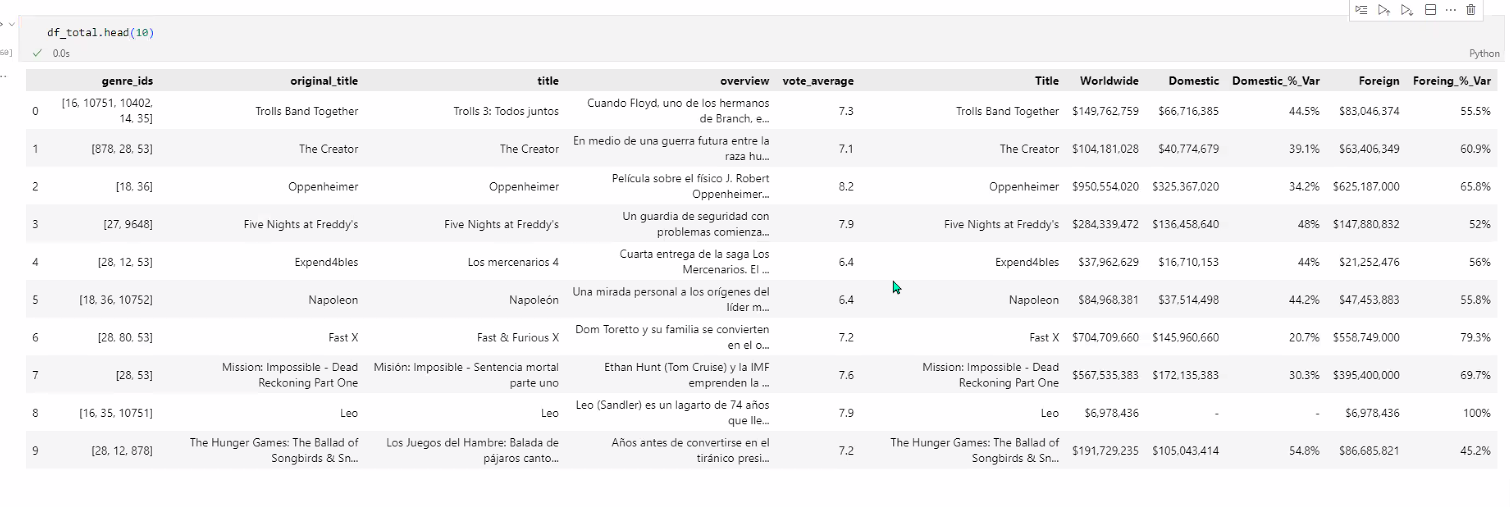

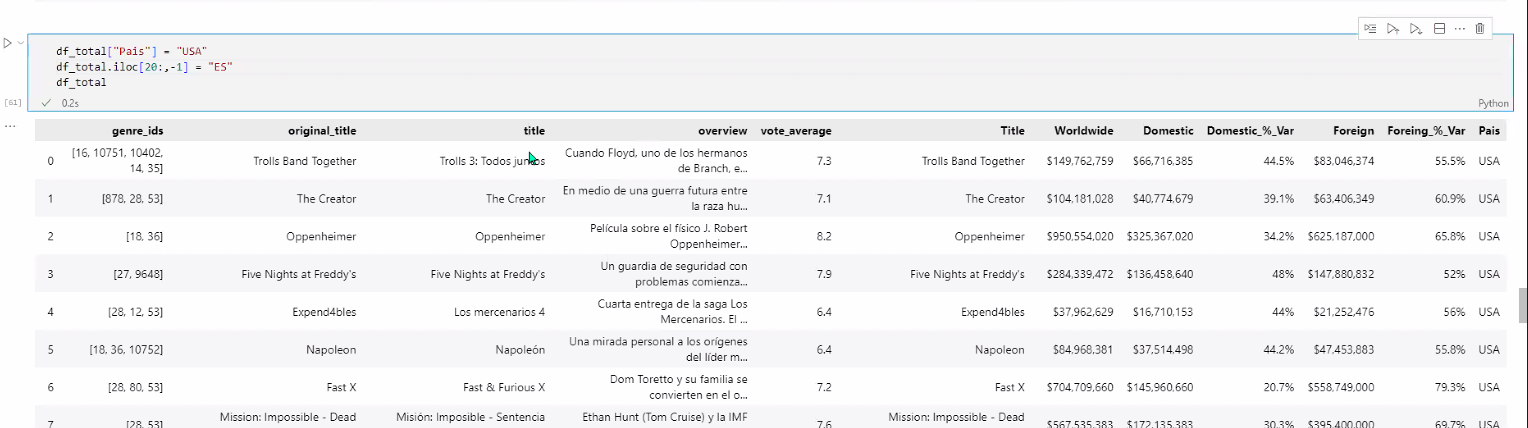

### 2.6

Muestra las películas españolas para las que sí hay información de ingresos. Cuidado: Tiene "truco"


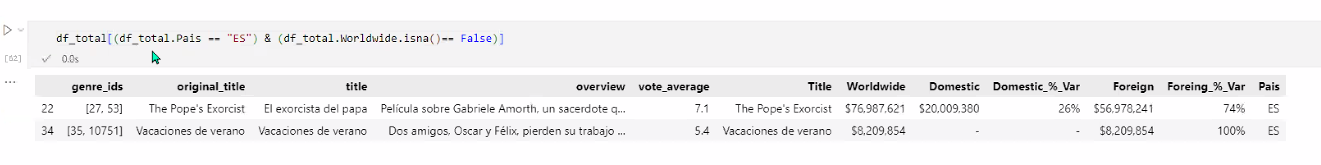

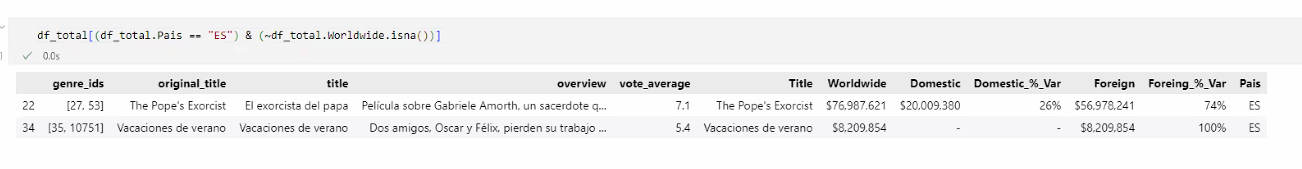

### 2.7
Para terminar, vuelve a cruzar las tablas pero ahora con un inner join de forma que sólo nos quedemos con las peliculas que tienen recaudación en box office. Antes marca de alguna manera el indice de popularidad en df_base_movies y después de hacer el join comprueba "visualmente" cuanto de correlados están los rakings de popularidad e ingresos.

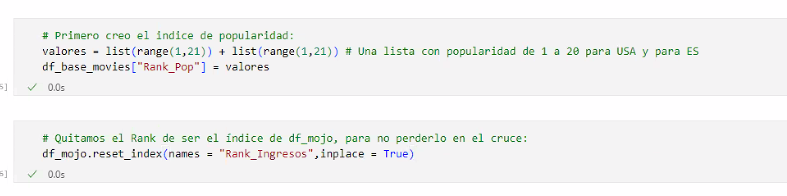

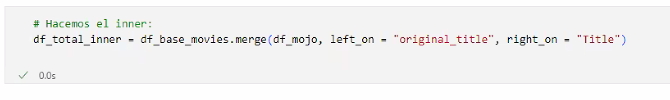

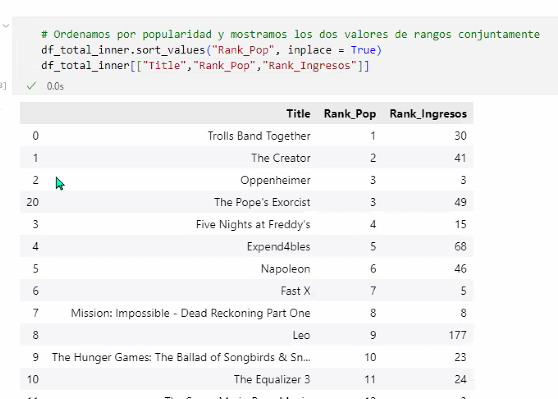

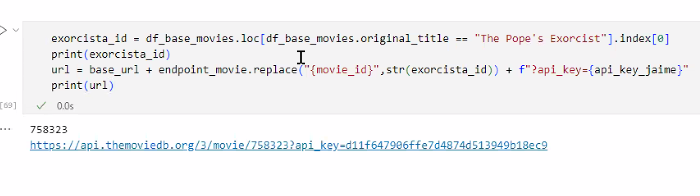

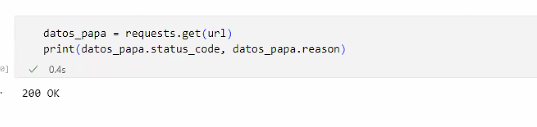

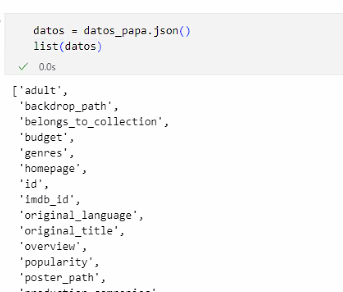

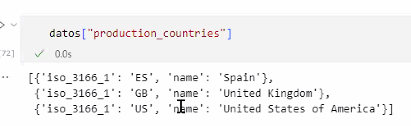